In [18]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import *
from sklearn.metrics import *

In [11]:
data = pd.read_csv('C:\\Users\\neeth\\Downloads\\mlLab\\dataset\\covid.csv')
data

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False
5,6,Low,Normal,Normal,High,Normal,High,True
6,7,Normal,Low,Low,High,Normal,Normal,True
7,8,Normal,High,Normal,High,Normal,Normal,False
8,9,Normal,High,Normal,High,High,High,True
9,10,Normal,Normal,High,High,Normal,Normal,False


In [12]:
le = preprocessing.LabelEncoder()
pc=le.fit_transform(data['pc'].values)
wbc=le.fit_transform(data['wbc'])
mc=le.fit_transform(data['mc'])
ast=le.fit_transform(data['ast'])
bc=le.fit_transform(data['bc'])
ldh=le.fit_transform(data['ldh'])
y=le.fit_transform(data['diagnosis'])

In [13]:
X=np.array(list(zip(pc,wbc,mc,ast,bc,ldh)))
X

array([[1, 1, 1, 0, 1, 1],
       [1, 1, 2, 0, 1, 0],
       [1, 0, 2, 0, 1, 1],
       [1, 0, 2, 0, 0, 1],
       [1, 2, 0, 0, 1, 1],
       [1, 2, 2, 0, 1, 0],
       [2, 1, 1, 0, 1, 1],
       [2, 0, 2, 0, 1, 1],
       [2, 0, 2, 0, 0, 0],
       [2, 2, 0, 0, 1, 1],
       [2, 2, 0, 0, 1, 0],
       [0, 1, 1, 1, 1, 1],
       [0, 2, 0, 1, 1, 1],
       [0, 2, 0, 1, 0, 0],
       [0, 0, 2, 1, 1, 0],
       [1, 2, 0, 0, 0, 1],
       [2, 2, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 0],
       [2, 2, 2, 0, 1, 1],
       [2, 0, 2, 0, 1, 0],
       [2, 1, 2, 0, 1, 0],
       [1, 0, 2, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [0, 0, 2, 1, 1, 1],
       [0, 2, 2, 1, 1, 1]])

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
naive = MultinomialNB()
naive.fit(x_train,y_train)
y_pred = naive.predict(x_test)

In [30]:
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
print("Classificaiton Report : ",classification_report(y_test,y_pred))

Accuracy Score :  0.5714285714285714
Classificaiton Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.67      0.80      0.73         5

    accuracy                           0.57         7
   macro avg       0.33      0.40      0.36         7
weighted avg       0.48      0.57      0.52         7



In [21]:
lrprobs = naive.predict_proba(x_test)
lrprobs

array([[0.44737287, 0.55262713],
       [0.68765293, 0.31234707],
       [0.35170335, 0.64829665],
       [0.20045506, 0.79954494],
       [0.22710239, 0.77289761],
       [0.26614833, 0.73385167],
       [0.14252022, 0.85747978]])

In [22]:
lrprobs=lrprobs[:,1]
lrprobs

array([0.55262713, 0.31234707, 0.64829665, 0.79954494, 0.77289761,
       0.73385167, 0.85747978])

In [26]:
lrfpr,lrtpr,_=roc_curve(y_test,lrprobs)

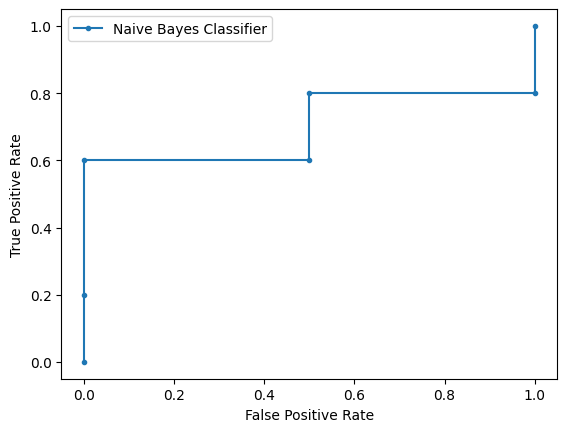

In [27]:
from matplotlib import pyplot
pyplot.plot(lrfpr,lrtpr,marker='.',label="Naive Bayes Classifier")
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.legend()
pyplot.show()